PRM - Lazy Probabilistic Roadmap Planners (lazy-PRM)
====================================================

This code is part of the course "Introduction to robot path planning" (Author: Bjoern Hein).

Version | Author
------------ | -------------
0.2 | Björn Hein


This worksheet **explains the basic concepts of path planning using a lazy probablistic roadmap approach (lazy-PRM)** 


License is based on Creative Commons: Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) (pls. check: http://creativecommons.org/licenses/by-nc/4.0/)

**Attention**: This worksheet has an external dependency to the file "InnoKonz2DEnv.py". This file contains a simple 2D environment based on numpy arrays and an interface for the use as collision checking in the algorithms.

Important links are:

    General Info: http://www.python.org
    Python tutorial http://www.python.org/doc/tut/
    NetworkX http://networkx.github.io/
    NumPy and SciPy Guide http://docs.scipy.org/
    Matplotlib gallery http://matplotlib.sourceforge.net/gallery.html

Remember that:

    you have to press ctrl-return or shift-return, to execute the code in the code sections, only then the variables are "generated" and can be used
    you can execute the whole notebook by Cell->runAll





Pre-Info
=======

Before coming to the algorithm itself, a short info about the **zip** function, which is used to generate out of the path list a list of consecutive path segments:


In [6]:
examplePath = [0,1,2,3,4,5,6,7,8]
examplePathSegements = zip(examplePath,examplePath[1:])
print ("Example of Path",list(examplePath))
print ("Example of generated path segments", list(examplePathSegements))


Example of Path [0, 1, 2, 3, 4, 5, 6, 7, 8]
Example of generated path segments [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8)]


Lazy-PRM 
========

Following an example implementation of the Lazy-PRM as discussed in the lecture. The only kind of refinement step is a  uniform distribution of new configurations.

In [7]:
from IPLazyPRM import LazyPRM
from IPVISLazyPRM import lazyPRMVisualize
import matplotlib.pylab as plt

In [8]:
import IPTestSuite as ts

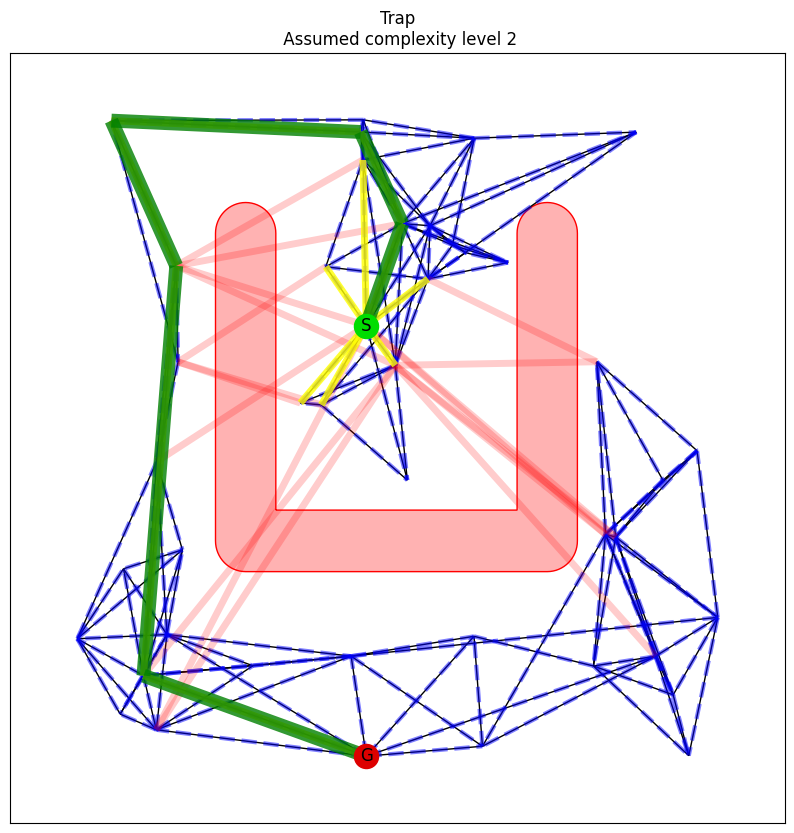

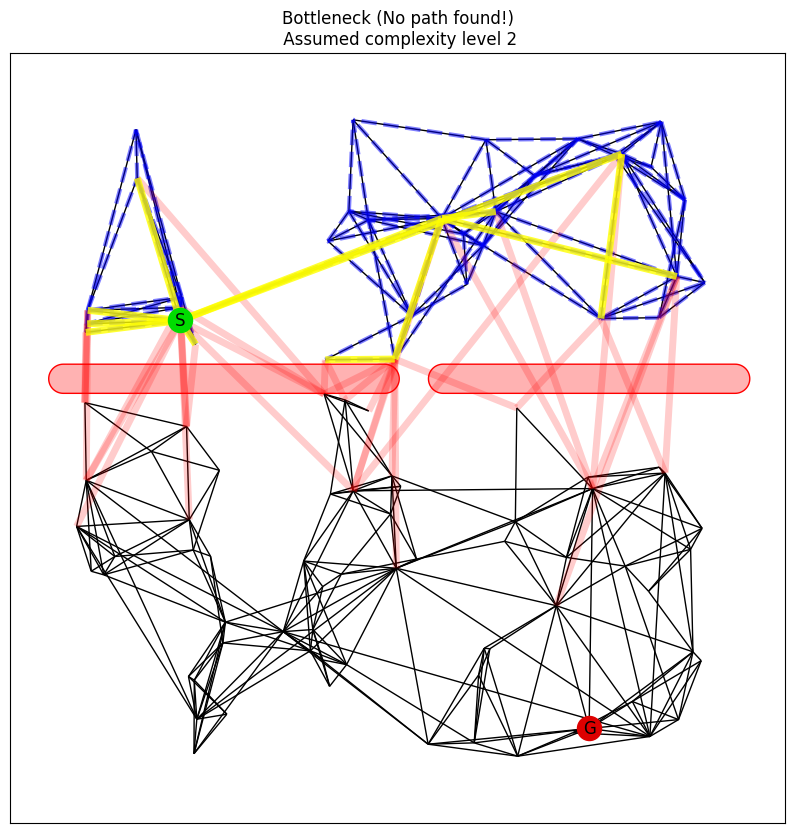

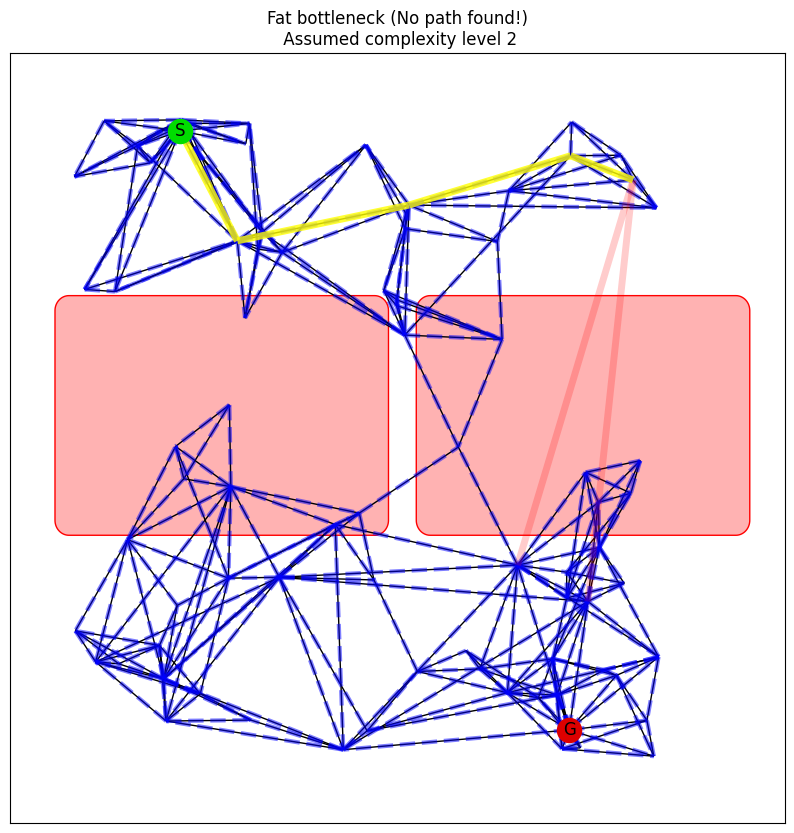

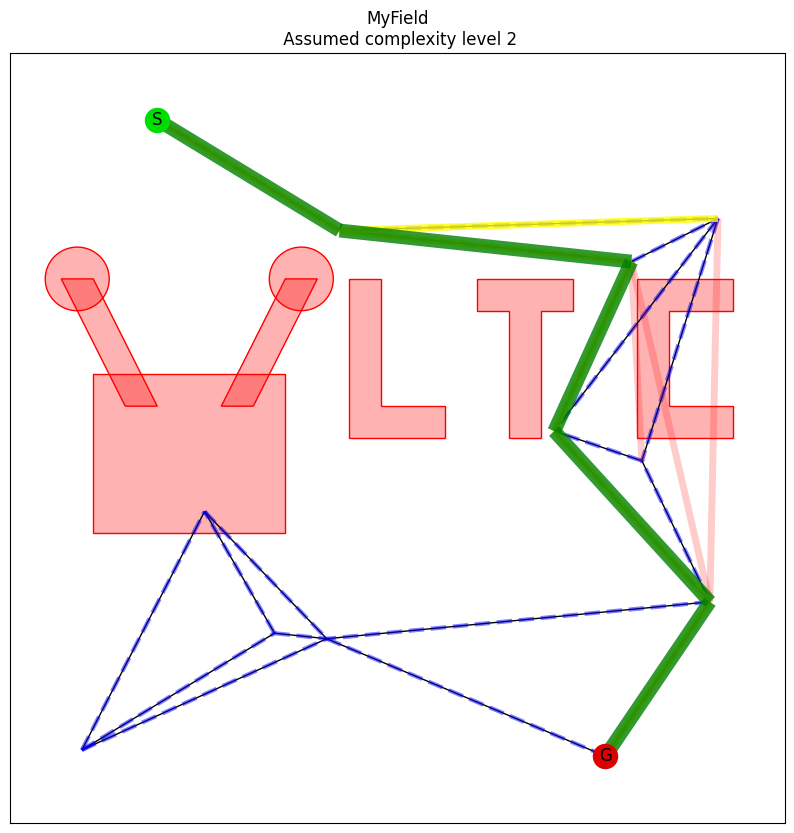

In [9]:
lazyConfig = dict()
lazyConfig["initialRoadmapSize"] = 10 # number of nodes of first roadmap
lazyConfig["updateRoadmapSize"]  = 3 # number of nodes to add if there is no connection from start to end
lazyConfig["kNearest"] = 5 # number of nodes to connect to during setup
lazyConfig["maxIterations"] = 30 # number of nodes to connect to during setup

for benchmark in ts.benchList:
    try:
        fig_local = plt.figure(figsize=(10,10))
        ax = fig_local.add_subplot(1,1,1)
        vis = LazyPRM(benchmark.collisionChecker)
        solution = vis.planPath(benchmark.startList, benchmark.goalList, lazyConfig)
        title = benchmark.name
        if solution == []:
            title += " (No path found!)"
        title += "\n Assumed complexity level " + str(benchmark.level)
        ax.set_title(title)
        lazyPRMVisualize(vis, solution, ax=ax, nodeSize=50)
    except Exception as e:
        print("ERROR: ",benchmark.name, e)

Interactive Tests
=================

In [10]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from shapely.geometry import Point, Polygon, LineString
import matplotlib.pylab as plt

ModuleNotFoundError: No module named 'ipywidgets'

In [ ]:
import IPTestSuite as ts

benchmark = ts.benchList[0]

In [ ]:
@interact(initialRoadmapSize=(5, 1000), updateRoadmapSize=(20,100), kNearest=(3,10), maxIterations=(10,100), __manual=True)
def test(initialRoadmapSize=6, updateRoadmapSize=30, kNearest=5, maxIterations=50):
    mystart = [[1,20]]
    myend = [[20,1]]
    print("test",initialRoadmapSize)
    environment = benchmark.collisionChecker
    lazy = LazyPRM(environment)
    lazyConfig = dict()
    lazyConfig["initialRoadmapSize"] = initialRoadmapSize # number of nodes of first roadmap
    lazyConfig["updateRoadmapSize"]  = updateRoadmapSize # number of nodes to add if there is no connection from start to end
    lazyConfig["kNearest"] = 5 #kNearest number of nodes to connect to during setup
    lazyConfig["maxIterations"] = maxIterations # number of nodes to connect to during setup

    #environment.resetCounter()
    
    solution = lazy.planPath(mystart, myend, lazyConfig)

    fig_local = plt.figure(figsize=(10,10))
    ax = fig_local.add_subplot(1,1,1)
    lazyPRMVisualize(lazy, solution, ax=ax)
 